In [1]:
%cd polymer_growth_simulation/

/home/jordy/Documents/Department Knowledge engineering/Research Project DSDM 2/polymer_growth_simulation


In [3]:
from simulation import polymer
from hillClimbing import hillClimbing
from distributionComparison import minMaxNorm, medianFoldNorm
from evolutionaryAlgorithm import EvolutionaryAlgorithm
import matplotlib.pyplot as plt
import numpy as np

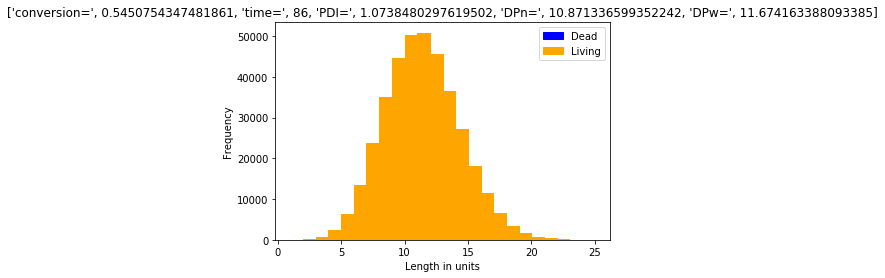

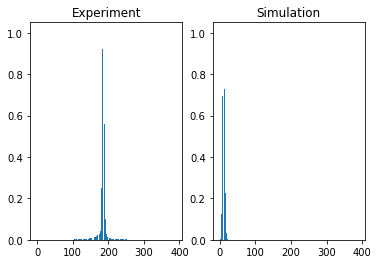

22.06113516872345

In [3]:
#Hill_climbing by minMaxNorm, Bryns parameters as initial point
diff = minMaxNorm('Data/polymer_20k.xlsx', polymer)
diff.sim(87.84,380000.0,6871104.0,0.16320000000000007,5.804489599999997e-05,0.29000000000000026,
         0.30830720000000006, 1.9590800000000006, 1.0236800000000001, 1.0048368639999998, final_plot=True)
diff = minMaxNorm('Data/polymer_20k.xlsx', polymer)
diff.get_difference([87.84,380000.0,6871104.0,0.16320000000000007,5.804489599999997e-05,0.29000000000000026,
         0.30830720000000006, 1.9590800000000006, 1.0236800000000001, 1.0048368639999998], plot=True)

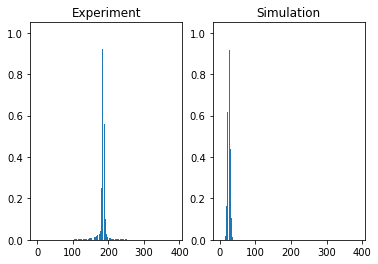

17.661812516862973

In [5]:
#EA by minMaxNorm
diff = minMaxNorm('Data/polymer_20k.xlsx', polymer)
diff.get_difference([1.80800000e+03, 3.56844000e+05, 8.77272900e+06, 9.99990000e-01,
 1.10374421e-06, 2.50835556e-01, 2.86193617e-01, 3.92643864e-01,
 5.98767013e-01, 1.00000000e+00], plot=True)

In [15]:
out = polymer(1.80800000e+03, 3.56844000e+05, 8.77272900e+06, 9.99990000e-01,
 1.10374421e-06, 2.50835556e-01, 2.86193617e-01, 3.92643864e-01,
 5.98767013e-01, 1.00000000e+00,final_plot=False)


In [35]:
out2=[]
out1 = np.hstack((out[0],400))
out2 =np.hstack((out[1],400))
out3 = np.array([])
print((out1))
ax = plt.subplot(111)
make_histogram(out1,out2,out3,True,1000,100,1000)

[ 23.  20.  28. ...  28.  25. 400.]


In [16]:
def make_histogram(living, dead, coupled, coloured, initial_monomer, current_monomer, time):

    ax.clear()
    d = np.hstack((living, dead, coupled))
    # calculate M_n, M_w and PDI
    DPn = np.mean(d)
    DPw = np.sum(np.square(d)) / (DPn * d.shape[0])
    PDI = DPw / DPn
    conversion = 1 - current_monomer / initial_monomer
    # dlmwrite('polymerOutput.txt',[time, conversion, DPn, DPw, PDI], '-append');
    if coloured == 0:
        ax.hist(d, bins=int(np.max(d) - np.min(d)), facecolor='b')
    else:
        step = np.ceil((np.max(d) - np.min(d)) / 1000)
        binEdges = np.arange(np.min(d) - 0.5, np.max(d) + 0.5, step)
        midbins = binEdges[0:-1] + (binEdges[1:] - binEdges[0:-1]) / 2
        if coupled.size == 0:                    


            c,b,e = ax.hist([dead, living], bins=midbins, histtype='barstacked', stacked=False, label=['Dead', 'Living'])
            plt.setp(e[0], color='blue')
            plt.setp(e[1], color='orange')


        else:
            ax.hist([coupled, dead, living], bins=midbins, histtype='bar', stacked=True,
                    label=['Terminated', 'Dead', 'Living'])

    ax.set_xlabel('Length in units')
    ax.set_ylabel('Frequency')
    ax.set_title(['conversion=', conversion, 'time=', time, 'PDI=', PDI, 'DPn=', DPn, 'DPw=', DPw])
    ax.legend()


    plt.pause(1e-40)

In [38]:
#EA by medianFoldNorm, after ~50 generations
diff = medianFoldNorm('Data/polymer_20k.xlsx', polymer)
diff.costFunction([1.80800000e+03, 3.56844000e+05, 8.77272900e+06, 9.99990000e-01,
 1.10374421e-06, 2.50835556e-01, 2.86193617e-01, 3.92643864e-01,
 5.98767013e-01, 1.00000000e+00], plot=True)



0.014297668969968475

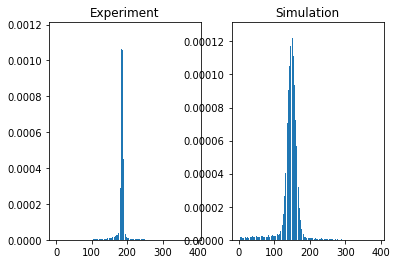

0.693763220333111

In [9]:
#EA by MedianFoldNorm, Parameters by Bryn
diff = medianFoldNorm('Data/polymer_20k.xlsx', polymer)
diff.get_difference([1000, 100000, 31600000, 0.2,
    0.0000806, 0.5, 0.67, 0.67, 1, 1], plot=True)

In [12]:
#Simulation run
polymer(1.32900000e+03 ,4.16100000e+04 ,7.99666300e+06 ,4.23732080e-01
 ,9.07361525e-06 ,1.84915999e-01 ,1.51362570e-01 ,2.46324195e-01
 ,3.92821762e-01 ,1.00000000e+00, final_plot=True)

KeyboardInterrupt: 

In [9]:
#Simulation run, Parameters Bryn
%matplotlib
# plt.figure(figsize=(10,10))
polymer(1000, 100000, 31600000, 0.2,
    0.0000806, 0.5, 0.67, 0.67, 1, 1, final_plot=1)


Using matplotlib backend: TkAgg


KeyboardInterrupt: 

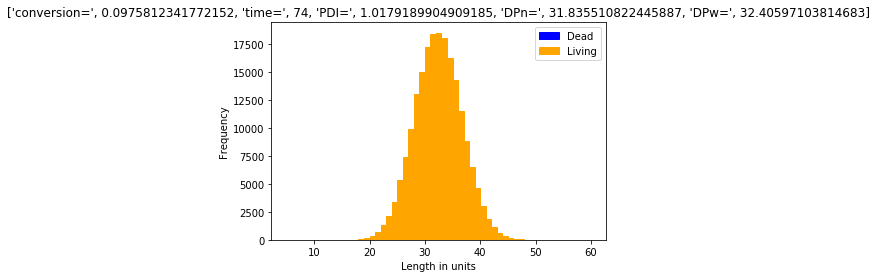

[array([26., 32., 30., ..., 33., 32., 30.]),
 array([33.]),
 array([], dtype=float64)]

In [14]:
#EA by user specified medianFoldNorm, after 100 generations
diff = medianFoldNorm('Data/polymer_20k.xlsx', polymer)
diff.sim(7.50000000e+01, 2.00000000e+05, 6.32000000e+07, 4.32244901e-01
 ,1.17893391e-07 ,3.96402627e-01, 7.34230132e-01 ,4.46814299e-01
 ,2.13688435e-02, 1.00000000e+00, final_plot=True)


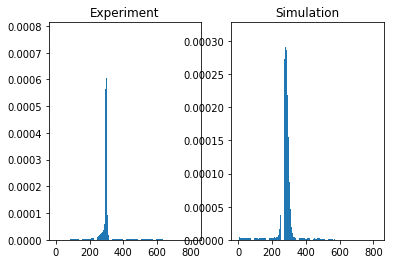

0.7203975771975102

In [25]:
#EA by user specified medianFoldNorm, after 100 generations, 30k dataset
diff = medianFoldNorm('Data/polymer_30k.xlsx', polymer)
diff.get_difference([1.78800000e+03, 1.04617000e+05, 3.12261850e+07, 4.56111334e-01
 ,1.02462388e-04 ,7.74954226e-01, 5.44010129e-01, 6.06096389e-01
 ,9.99990000e-01, 1.00000000e+00], plot=True)

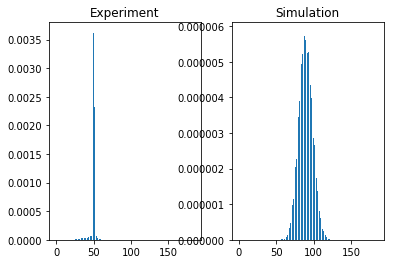

0.20821771829207153

In [10]:
#EA by user specified medianFoldNorm, after 100 generations, 5k dataset
diff = medianFoldNorm('Data/polymer_5k.xlsx', polymer)
diff.get_difference([2.16700000e+03, 5.00000000e+04, 1.58000000e+07, 4.78745815e-02
, 2.06215028e-07 ,9.39540822e-02 ,3.29120024e-01 ,1.94009204e-02
 ,3.14165428e-01, 1.00000000e+00], plot=True)

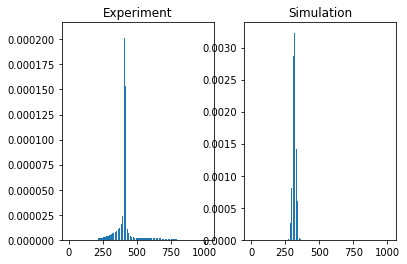

1.4833671367192258

In [4]:
#EA by user specified medianFoldNorm, after 100 generations, 50k dataset
diff = medianFoldNorm('Data/polymer_50k.xlsx', polymer)
diff.get_difference([3.03400000e+03, 5.00000000e+05 ,1.58000000e+08, 9.99990000e-01,
 2.08516654e-05, 3.86720269e-01, 6.24058384e-01 ,8.01052548e-03,
 7.01506139e-01 ,1.00000000e+00], plot=True)

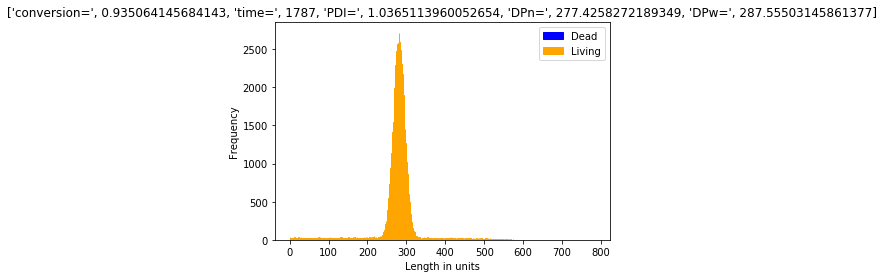

[array([276., 271., 273., ..., 306., 283., 298.]),
 array([ 70.,  78.,  79., ..., 275., 288., 276.]),
 array([], dtype=float64)]

In [13]:
diff.sim(1.78800000e+03, 1.04617000e+05, 3.12261850e+07, 4.56111334e-01
 ,1.02462388e-04 ,7.74954226e-01, 5.44010129e-01, 6.06096389e-01
 ,9.99990000e-01, 1.00000000e+00,final_plot=True)

